In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

data_2d = pd.read_csv('data/data_2d.csv')
mnist = pd.read_csv('data/mnist.csv')

scaler = StandardScaler()
data_2d_scaled = scaler.fit_transform(data_2d)
mnist_scaled = scaler.fit_transform(mnist)


In [4]:
def plot_elbow_method(data, max_clusters=10):
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), sse, marker='o')
    plt.xticks(range(1, max_clusters + 1))
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method')
    plt.grid(True)
    plt.show()


In [5]:
def kmeans_clustering(data, n_clusters, reduce_dimensionality=False):
    if reduce_dimensionality:
        pca = PCA(n_components=2)
        data = pca.fit_transform(data)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
    plt.title(f'K-means Clustering (n_clusters={n_clusters})')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

    return labels


Elbow Method for 2D Data


d:\Programming\goit-dc-6\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Programming\goit-dc-6\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\nikit\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nikit\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\nikit\AppData\Local\Programs\Python\Python3

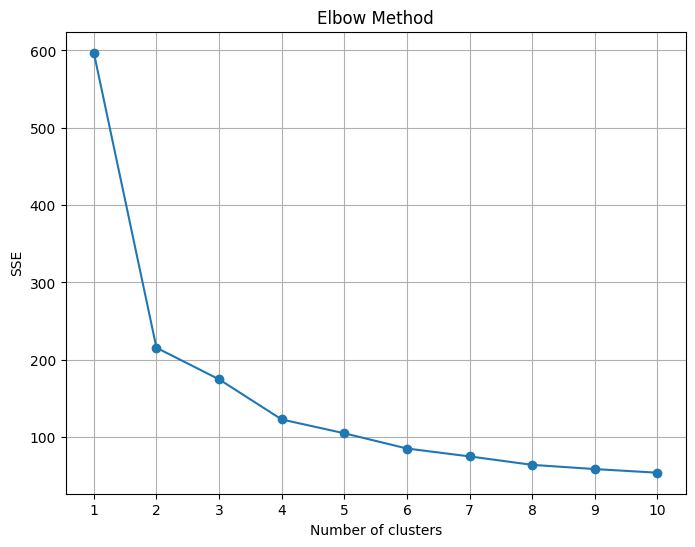

K-means Clustering for 2D Data


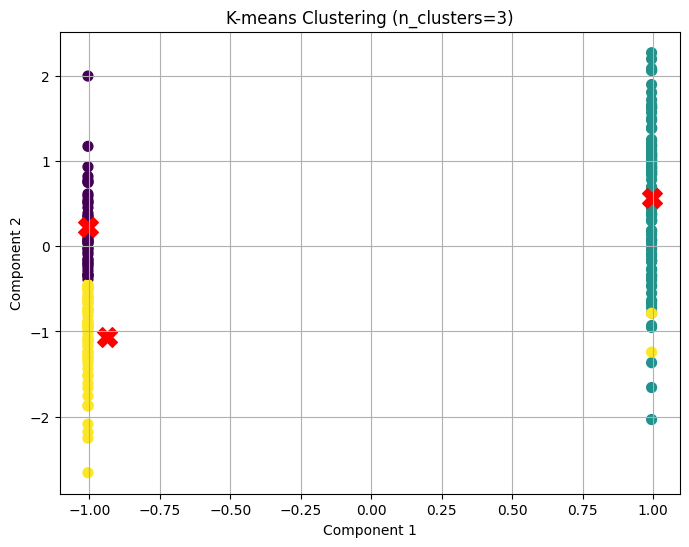

In [6]:
print("Elbow Method for 2D Data")
plot_elbow_method(data_2d_scaled)

print("K-means Clustering for 2D Data")
kmeans_labels_2d = kmeans_clustering(data_2d_scaled, n_clusters=3)


Elbow Method for MNIST Data


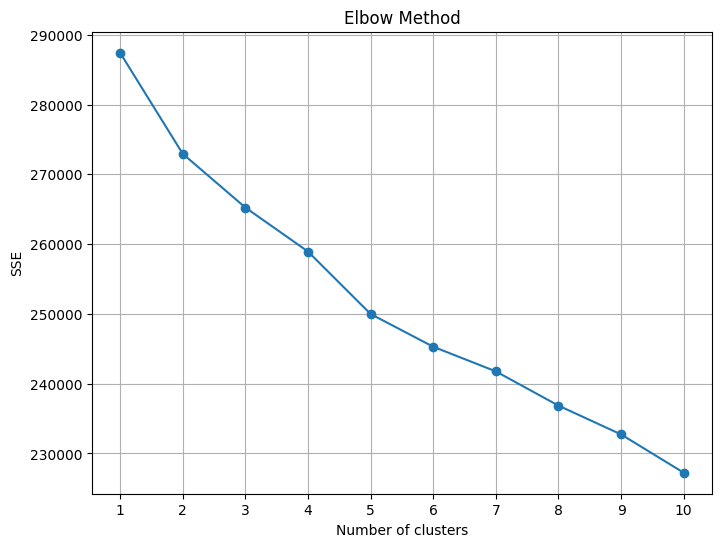

K-means Clustering for MNIST Data with PCA


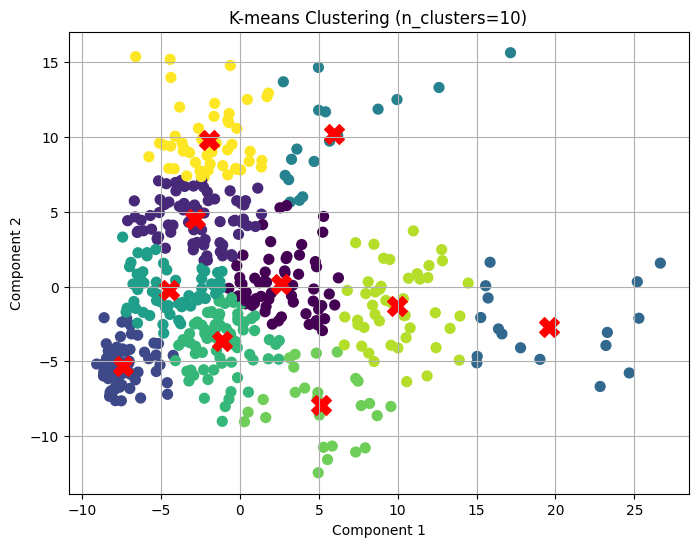

In [7]:
print("Elbow Method for MNIST Data")
plot_elbow_method(mnist_scaled)

print("K-means Clustering for MNIST Data with PCA")
kmeans_labels_mnist = kmeans_clustering(mnist_scaled, n_clusters=10, reduce_dimensionality=True)
